# Stereographic Visualization of 5-Dimensional Regular Polytopes
(https://www.mdpi.com/2073-8994/11/3/391#FD7-symmetry-11-00391)

## First tests for visualization

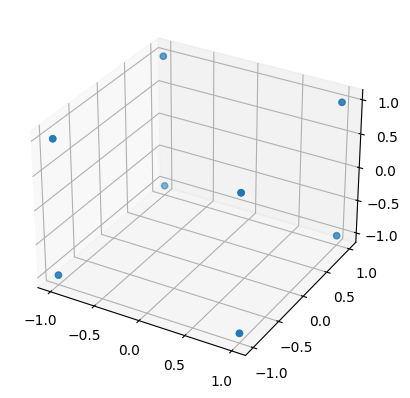

In [1]:
#  
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 4D array of hypercube vertices
vertices = np.array([[-1, -1, -1, -1],
                     [1, -1, -1, -1],
                     [1, 1, -1, -1],
                     [-1, 1, -1, -1],
                     [-1, -1, 1, -1],
                     [1, -1, 1, -1],
                     [1, 1, 1, -1],
                     [-1, 1, 1, -1],
                     [-1, -1, -1, 1],
                     [1, -1, -1, 1],
                     [1, 1, -1, 1],
                     [-1, 1, -1, 1],
                     [-1, -1, 1, 1],
                     [1, -1, 1, 1],
                     [1, 1, 1, 1],
                     [-1, 1, 1, 1]])

# 4D to 3D projection matrix
M = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0]])

# Project the vertices to 3D
vertices_3d = np.dot(vertices, M.T)

# Create the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Add the vertices to the figure
ax.scatter(vertices_3d[:, 0], vertices_3d[:, 1], vertices_3d[:, 2])

plt.show()